In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Pavithran\Downloads\wine-clustering.csv")
data.head()
x=data[["Alcohol","Ash"]]
print(x)

     Alcohol   Ash
0      14.23  2.43
1      13.20  2.14
2      13.16  2.67
3      14.37  2.50
4      13.24  2.87
..       ...   ...
173    13.71  2.45
174    13.40  2.48
175    13.27  2.26
176    13.17  2.37
177    14.13  2.74

[178 rows x 2 columns]


In [3]:
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
print(x)

      Alcohol       Ash
0    0.842105  0.572193
1    0.571053  0.417112
2    0.560526  0.700535
3    0.878947  0.609626
4    0.581579  0.807487
..        ...       ...
173  0.705263  0.582888
174  0.623684  0.598930
175  0.589474  0.481283
176  0.563158  0.540107
177  0.815789  0.737968

[178 rows x 2 columns]


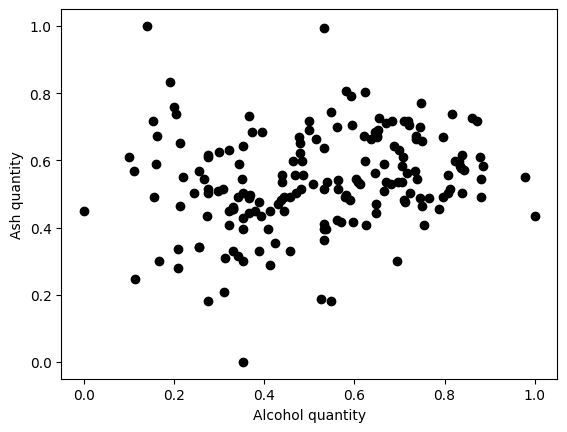

In [4]:
plt.scatter(x["Alcohol"],x["Ash"],color='black')
plt.xlabel("Alcohol quantity")
plt.ylabel("Ash quantity")
plt.show()

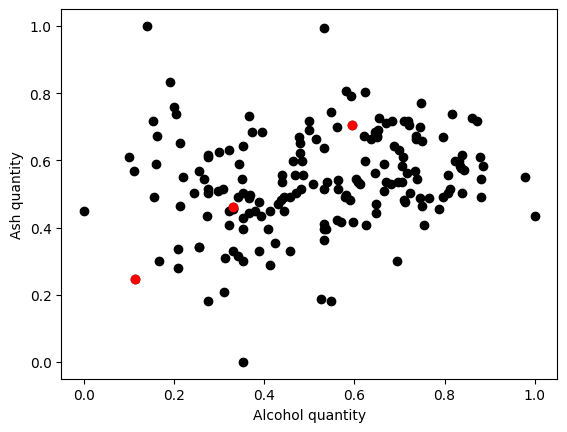

In [5]:
k=3

centroids=x.sample(n=k)
plt.scatter(x["Alcohol"],x["Ash"],color='black')
plt.scatter(centroids["Alcohol"],centroids["Ash"],color='red')
plt.xlabel("Alcohol quantity")
plt.ylabel("Ash quantity")
plt.show()

0.0


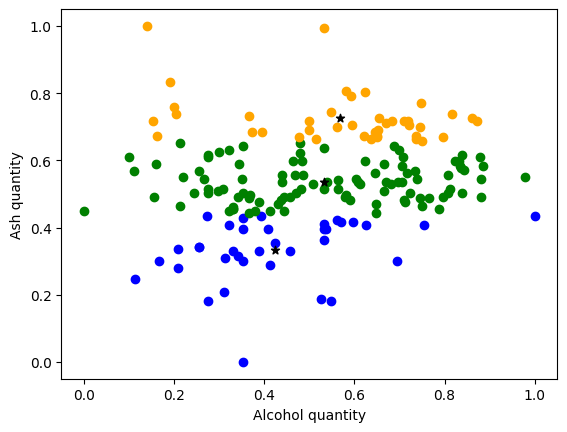

In [88]:
diff = 1
j = 0
while(diff != 0):
    xd = x.copy()
    i = 0
    for index1, row_c in centroids.iterrows():
        ed = []
        for index2, row_d in xd.iterrows():
            d1 = (row_c["Alcohol"] - row_d["Ash"])**2
            d2 = (row_c["Ash"] - row_d["Ash"])**2  # Fix this line
            d = np.sqrt(d1 + d2)
            ed.append(d)
        x[i] = ed
        i = i + 1

    C = []
    for index, row in x.iterrows():
        min_dist = row[0]
        pos = 0
        for i in range(k):
            if row[i] < min_dist:
                min_dist = row[i]
                pos = i
        C.append(pos + 1)

    x["Cluster"] = C
    Centroids_new = x.groupby(["Cluster"]).mean()[["Ash", "Alcohol"]]

    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['Ash'] - Centroids['Ash']).sum() + (Centroids_new['Alcohol'] - Centroids['Alcohol']).sum()
        print(diff.sum())

    Centroids = x.groupby(["Cluster"]).mean()[["Ash", "Alcohol"]]

color = ['blue', 'green', 'orange', 'red']
for i in range(k):
    cluster_data = x[x["Cluster"] == i+1]
    plt.scatter(cluster_data["Alcohol"], cluster_data["Ash"], c=color[i])

plt.scatter(Centroids["Alcohol"], Centroids["Ash"], c='black',marker='*')
plt.xlabel('Alcohol quantity')
plt.ylabel('Ash quantity')
plt.show()

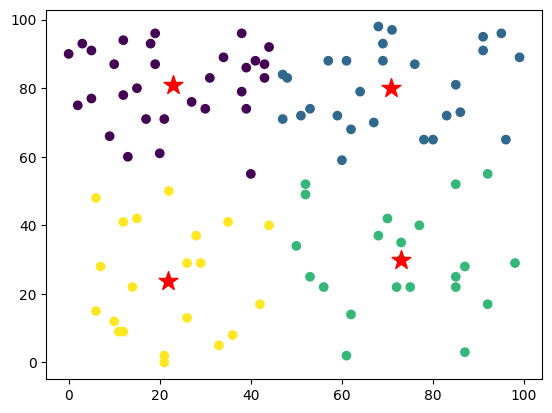

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, K):
        self.K = K
        self.centroids = None

    
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iter=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.K,X.shape[1]))
        
        for _ in range(max_iter):
            y = []

            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                y.append(np.argmin(distances))

            y = np.array(y)
            
            cluster_indices = []

            for i in range(self.K):
                cluster_indices.append(np.argwhere(y == i).flatten())
            
            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0))

            if np.max(np.abs(self.centroids - np.array(cluster_centers))) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y


random_points = np.random.randint(0, 100, size=(100, 2))

kmeans = KMeansClustering(K=4)

labels = kmeans.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker="*", s=200)
plt.show()
